In [52]:
import matplotlib.pyplot as plt
# Use ultralytics for YOLOv11
from ultralytics import YOLO, SAM
# CV2 to plot text on images
import cv2
# Numpy
import numpy as np
# Matplotlib is used for plotting
import matplotlib.pyplot as plt

In [20]:
# YOLOv11
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")


In [21]:
# Run inference with the YOLO11n model on the 'bus.jpg' image
results = model("img.png")


image 1/1 D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\img.png: 448x640 1 cow, 22.5ms
Speed: 2.5ms preprocess, 22.5ms inference, 4.8ms postprocess per image at shape (1, 3, 448, 640)


In [22]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

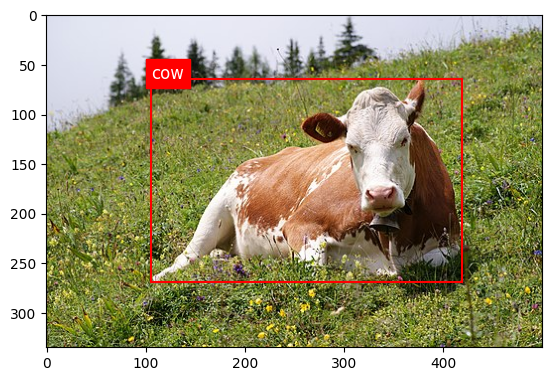

In [23]:
# Show the results on a matplotlib plot
for r in results:
    # Bounding boxes
    boxes = r.boxes
    # Class labels
    class_labels = boxes.cls
    # Plot the image with bounding boxes
    img = r.orig_img
    # BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # Get the label name from the class label
    _name = r.names[box.cls[0].item()]
    # Plot the bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu()
        plt.plot([x1, x2], [y1, y1], color='red')
        plt.plot([x2, x2], [y1, y2], color='red')
        plt.plot([x2, x1], [y2, y2], color='red')
        plt.plot([x1, x1], [y2, y1], color='red')
        # Plot the class label
        plt.text(x1, y1, _name, color='white', fontsize=12, backgroundcolor='red')
plt.show()

In [24]:
# Use YOLO on another image
results = model("img_1.png")


image 1/1 D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\img_1.png: 480x640 6 persons, 2 cars, 1 handbag, 74.7ms
Speed: 4.5ms preprocess, 74.7ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


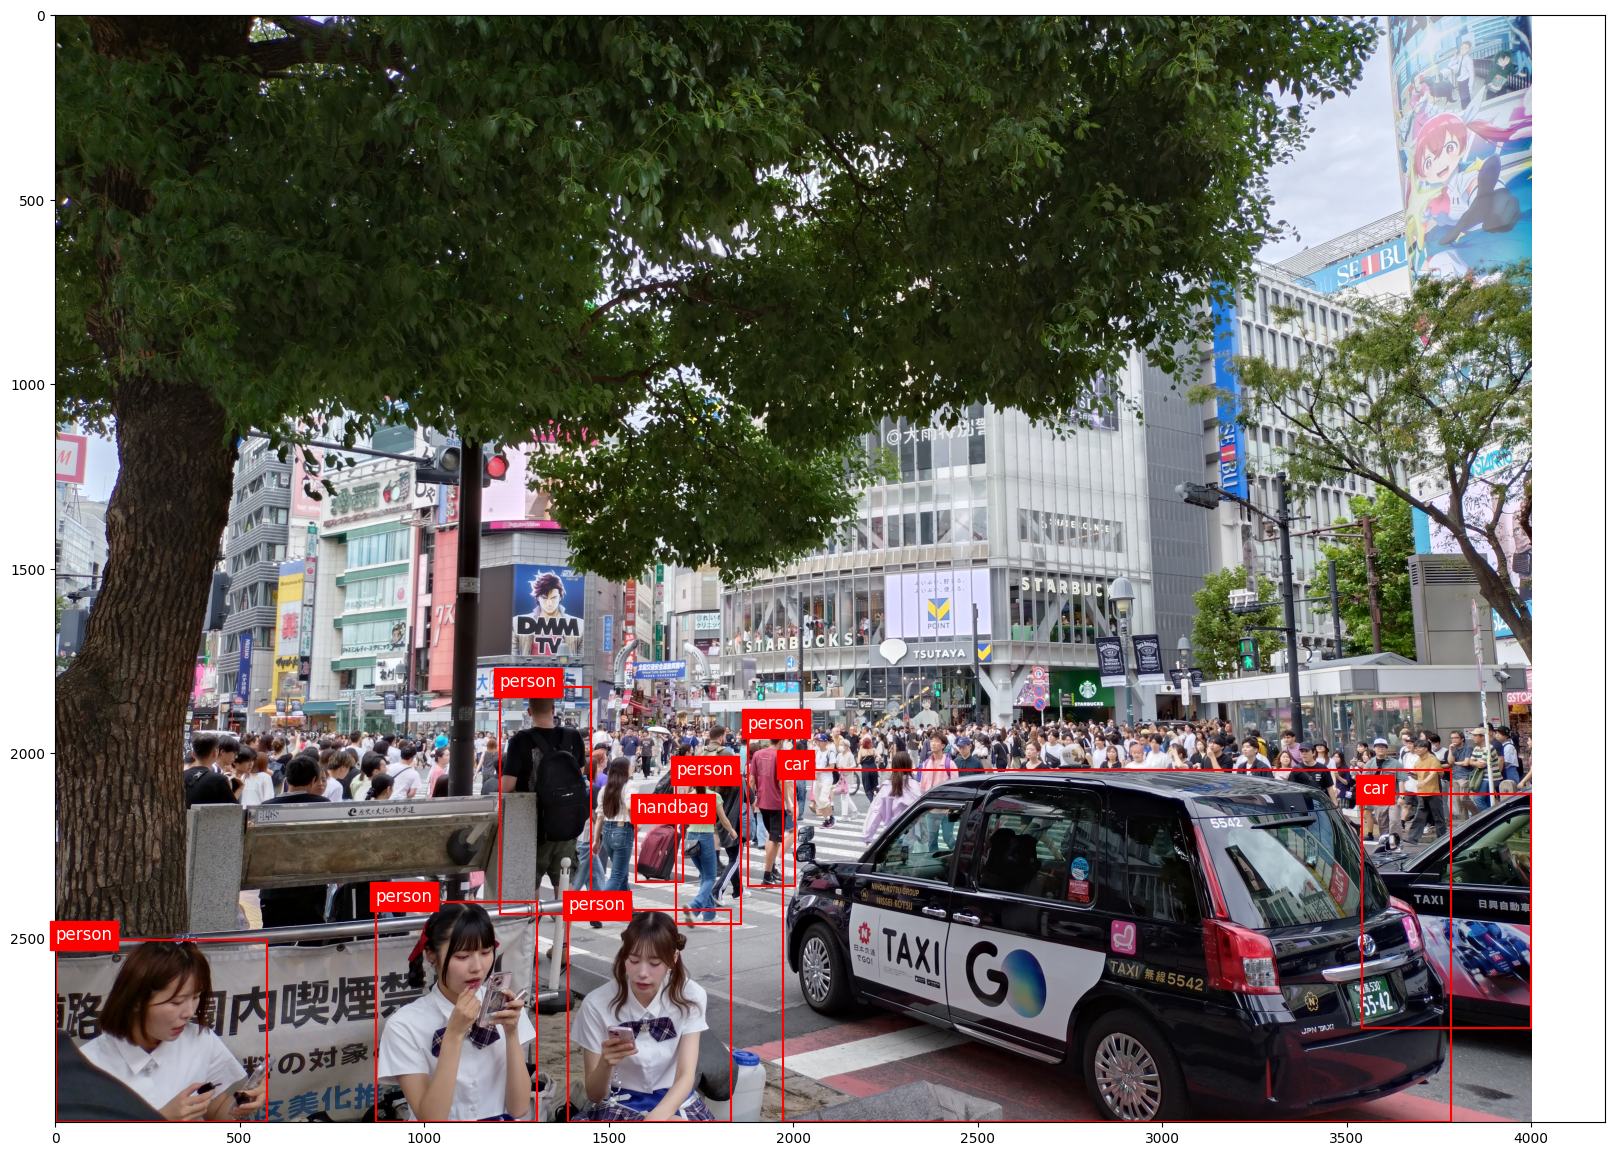

In [30]:
plt.figure(figsize=(20, 20))
for r in results:
    # Bounding boxes
    boxes = r.boxes
    # Class labels
    class_labels = boxes.cls
    # Plot the image with bounding boxes
    img = r.orig_img
    # BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # Get the label name from the class label

    # Plot the bounding boxes
    for box in boxes:
        _name = r.names[box.cls[0].item()]
        x1, y1, x2, y2 = box.xyxy[0].cpu()
        plt.plot([x1, x2], [y1, y1], color='red')
        plt.plot([x2, x2], [y1, y2], color='red')
        plt.plot([x2, x1], [y2, y2], color='red')
        plt.plot([x1, x1], [y2, y1], color='red')
        # Plot the class label
        plt.text(x1, y1, _name, color='white', fontsize=12, backgroundcolor='red')
plt.show()

In [32]:
# Segmentation
# Load a model
model_sam = SAM("sam_b.pt")

In [33]:
# Segmentation
results = model_sam("img_1.png")


image 1/1 D:\Hakiko\intelligent_signal_processing_lectures\intelligent-signal-processing-lectures\Lec04\img_1.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 6145.5ms
Speed: 8.8ms preprocess, 6145.5ms inference, 253.9ms postprocess per image at shape (1, 3, 1024, 1024)


In [36]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57'}
 obb: None
 orig_img: array([[[ 27,  51,  41],
         [ 28,  52,  42],
         [ 33,  58,  48],
         ...,
         [223, 201, 173],
         [225, 204, 173],
         [222, 203, 170]],
 
        [[ 29,  52,  44],
         [ 32,  56,  46],
         [

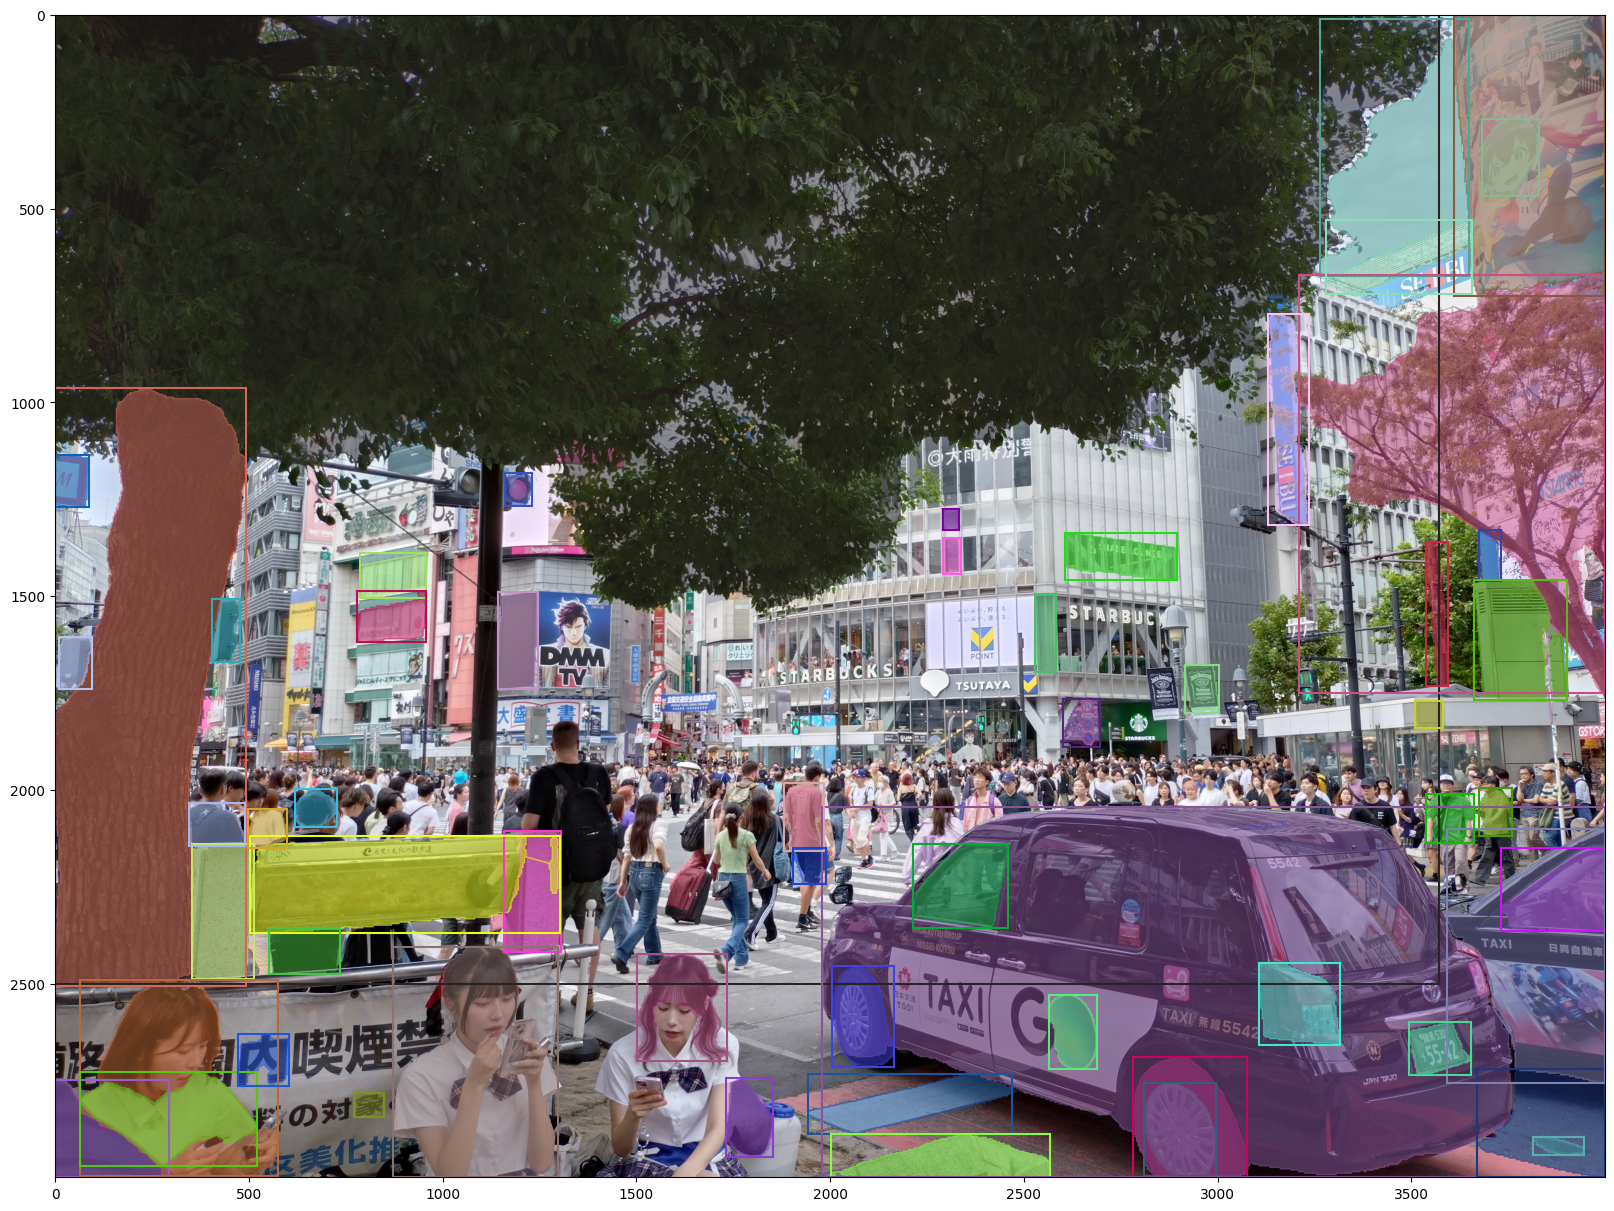

In [59]:
# Show the results on a matplotlib plot
plt.figure(figsize=(20, 20))
for r in results:
    # Segmentation masks
    masks = r.masks
    # Plot the image with masks
    img = r.orig_img
    # BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # Plot the masks
    for mask in masks:
        xy = mask.xy[0]
        x, y = xy[:, 0], xy[:, 1]
        # Get the mask color (random RGB color)
        color = np.random.rand(3)
        # Plot the bounding box
        x1, y1, x2, y2 = np.min(x), np.min(y), np.max(x), np.max(y)
        plt.plot([x1, x2], [y1, y1], color=color)
        plt.plot([x2, x2], [y1, y2], color=color)
        plt.plot([x2, x1], [y2, y2], color=color)
        plt.plot([x1, x1], [y2, y1], color=color)
        # Plot as a polygon
        plt.fill(x, y, color=color, alpha=0.5)

plt.show()
